In [84]:
import seaborn as sns
import pandas as pd
import numpy as np

In [85]:
df = (
sns
.load_dataset("titanic")
)

In [86]:
(
df
.head()
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [87]:
(
df
.describe()
)

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
df.memory_usage(deep=True)

Index            132
survived        7128
pclass          7128
sex            54979
age             7128
sibsp           7128
parch           7128
fare            7128
embarked       51626
class           1186
who            54168
adult_male       891
deck            1597
embark_town    60103
alive          52911
alone            891
dtype: int64

In [102]:
bytes_ = df.memory_usage(deep=True).sum()
KB = round(bytes_ / 1024, 2)
MB = round(KB / 1024, 2)
print('Memory Usage of df: {} Bytes\nMemory Usage of df: {} KB\nMemory Usage of df: {} MB'.format(bytes_, (KB), (MB)))

Memory Usage of df: 321252 Bytes
Memory Usage of df: 313.72 KB
Memory Usage of df: 0.31 MB


In [108]:
df.select_dtypes('int').describe()

,survived,pclass,sibsp,parch
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594
std,0.486592,0.836071,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000


### Ints

In [110]:
# chaining
(
    df
    .select_dtypes('int')
    .describe()
)

,survived,pclass,sibsp,parch
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594
std,0.486592,0.836071,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000


In [111]:
# can survived be an int8?
np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

In [112]:
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [113]:
(
df
.astype({'survived': 'int8', 'pclass': 'int8', 'sibsp': 'int8', 'parch': 'int8'})
.memory_usage(deep=True)
.sum() # was 321.252 
)

296304

### Floats

In [115]:
df.select_dtypes('float')

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [117]:
# oops! missing values
df.age.value_counts(dropna=False) # 177 NaN values

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: age, Length: 89, dtype: int64

In [124]:
# where are they missing?
(df
 .query('age.isnull()')
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [126]:
# chaining - add age columns
(df
 .assign(age=df.age.fillna(df.age.mean()))
 .describe()
)

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [130]:
# use this to ispect float sizes [6.5 x 10^4]
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [134]:
# chaining - add age columns
(df
 .assign(age=df.age.fillna(df.age.mean()).astype('float16'))
 .describe()
)

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.703125,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.007812,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.419922,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.703125,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [143]:
(df
 .assign(age=df.age.fillna(df.age.mean()).astype('float16'))
 .describe()
)

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.703125,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.007812,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.419922,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.703125,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [157]:
(df
 .assign(age=df.age.fillna(df.age.mean()).astype('float32'))
 .astype({'survived': 'int8', 'pclass': 'int8', 'age': 'float32', 'sibsp': 'int8',
          'parch': 'int8', 'fare': 'float32'})
 .describe()
)

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699120,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002012,1.102743,0.806057,49.693409
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329224


In [158]:
(df
 .assign(age=df.age.fillna(df.age.mean()).astype('float32'))
 .astype({'survived': 'int8', 'pclass': 'int8', 'age': 'float32', 'sibsp': 'int8',
          'parch': 'int8', 'fare': 'float32'})
 .memory_usage(deep=True)
 .sum() # was 321.252 
)

289176

### Objects

In [159]:
(df
 .select_dtypes('object')
)

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


In [164]:
# looks categorical
(df
 ['who']
 .value_counts(dropna=False)
)

man      537
woman    271
child     83
Name: who, dtype: int64

In [166]:
# looks categorical
(df
 ['embarked']
 .value_counts(dropna=False)
)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [169]:
# where are the valeus missing for embarked?
(df
 .query('embarked.isna()')
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [175]:
# embarked and embark_town to category
(df
 .assign(age=df.age.fillna(df.age.mean()).astype('float32'),
         embarked=df.embarked.fillna(df.embarked.mode()[0]).astype('category'),
         embark_town=df.embark_town.fillna(df.embark_town.mode()[0]).astype('category'))
 .astype({'survived': 'int8', 'pclass': 'int8', 'age': 'float32', 'sibsp': 'int8',
          'parch': 'int8', 'fare': 'float32', 'embarked': 'category', 
          'embark_town': 'category', 'sex': 'category', 'who': 'category',
          'alive': 'category'})
 .memory_usage(deep=True)
 .sum() # was 321.252 
)

21186

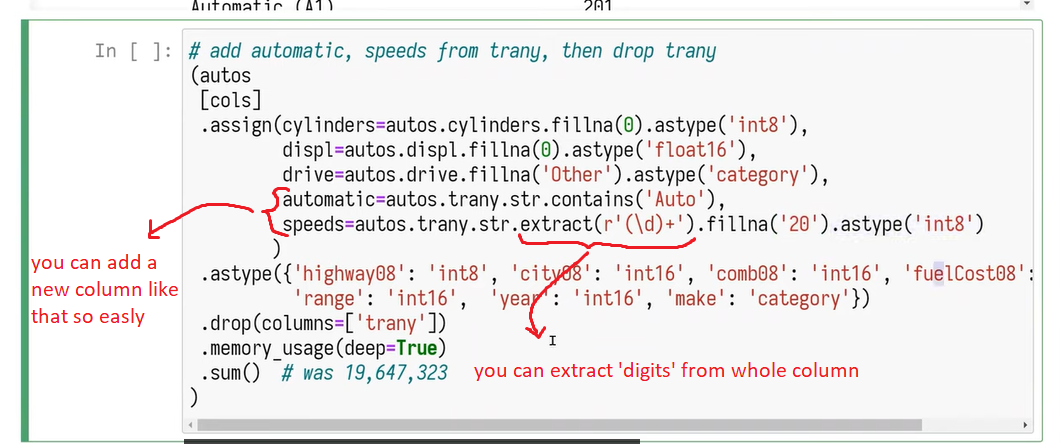

In [180]:
(df
 .assign(age=df.age.fillna(df.age.mean()).astype('float32'),
         embarked=df.embarked.fillna(df.embarked.mode()[0]).astype('category'),
         embark_town=df.embark_town.fillna(df.embark_town.mode()[0]).astype('category'))
 .astype({'survived': 'int8', 'pclass': 'int8', 'age': 'float32', 'sibsp': 'int8',
          'parch': 'int8', 'fare': 'float32', 'embarked': 'category', 
          'embark_town': 'category', 'sex': 'category', 'who': 'category',
          'alive': 'category'})
 .drop(columns=['adult_male', 'alive', 'deck', 'alone', 'class', 'who',
                'embark_town'])
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.250000,S
1,1,1,female,38.000000,1,0,71.283302,C
2,1,3,female,26.000000,0,0,7.925000,S
3,1,1,female,35.000000,1,0,53.099998,S
4,0,3,male,35.000000,0,0,8.050000,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.000000,S
887,1,1,female,19.000000,0,0,30.000000,S
888,0,3,female,29.699118,1,2,23.450001,S
889,1,1,male,26.000000,0,0,30.000000,C


In [183]:
# a glorious function
def tweak_df(df):
    return (df
             .assign(age=df.age.fillna(df.age.mean()).astype('float32'),
                     embarked=df.embarked.fillna(df.embarked.mode()[0]).astype('category'),
                     embark_town=df.embark_town.fillna(df.embark_town.mode()[0]).astype('category'))
             .astype({'survived': 'int8', 'pclass': 'int8', 'age': 'float32', 'sibsp': 'int8',
                      'parch': 'int8', 'fare': 'float32', 'embarked': 'category', 
                      'embark_town': 'category', 'sex': 'category', 'who': 'category',
                      'alive': 'category'})
             .drop(columns=['adult_male', 'alive', 'deck', 'alone', 'class', 'who',
                            'embark_town'])
            )

tweak_df(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.250000,S
1,1,1,female,38.000000,1,0,71.283302,C
2,1,3,female,26.000000,0,0,7.925000,S
3,1,1,female,35.000000,1,0,53.099998,S
4,0,3,male,35.000000,0,0,8.050000,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.000000,S
887,1,1,female,19.000000,0,0,30.000000,S
888,0,3,female,29.699118,1,2,23.450001,S
889,1,1,male,26.000000,0,0,30.000000,C
